In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Split data into train and test data
from sklearn.model_selection import train_test_split

# Preprocessing:
from sklearn.preprocessing import StandardScaler

# Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# To draw decision tree
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz


from sklearn.datasets import load_iris
import os
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
#importing the data file
dataSet = pd.read_csv('German Credit Data.csv')

In [3]:
dataSet.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
dataSet.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [5]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [6]:
count = dataSet.Risk.value_counts()
print(count)

good    700
bad     300
Name: Risk, dtype: int64


In [7]:
dataSet.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
dataSet ["Saving accounts"].fillna("0", inplace = True)
dataSet ["Checking account"].fillna("0", inplace = True)

In [9]:
dataSet.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [10]:
dataSet.shape

(1000, 10)

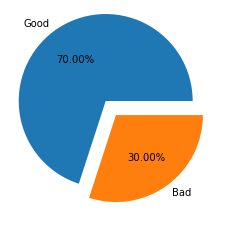

In [11]:
myexp = [0.2, 0]
plt.pie (count, labels = ("Good","Bad") , explode = myexp, autopct = "%.2f%%")
plt.show()

In [13]:
dataSet.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,0,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,0,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [20]:
# Male = 0, Female = 1
dataSet ['Sex'] = dataSet ['Sex'].replace({'male':0, 'female':1,'unknown' : 2})
# own = 1, rent = 0, free = 2
dataSet ['Housing'] = dataSet['Housing'].replace({'own' :0, 'rent': 1, 'free':2, 'unknown': 3})
# little = 1, moderate = 0, rich = 2, quite rich = 3
dataSet['Saving accounts'] = dataSet['Saving accounts'].replace ({'little' : 0, 'moderate' : 1, 'rich' : 2, 'quite rich' : 3, 'unknown' : 4})
# Yes: 1 # No : 0 # unknown:2
dataSet['Checking account'] = dataSet['Checking account'].replace ({'little' : 0, 'moderate' : 1, 'rich' : 2, 'unknown' : 3})
#good = 1, bad = 0
dataSet['Risk'] = dataSet['Risk'].replace ({'good': 1,'bad' : 0, 'unknown':2})
dataSet['Purpose'] = dataSet['Purpose'].replace ({'radio/TV': 0,'education' : 1, 'furniture/equipment' : 2, 'car' : 3, 'business' : 4, 'vacation/others' : 5, 'repairs':6,'domestic appliances':7})
dataSet.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,0,0,0,1169,6,0,1
1,22,1,2,0,0,1,5951,48,0,0
2,49,0,1,0,0,0,2096,12,1,1
3,45,0,2,2,0,0,7882,42,2,1
4,53,0,2,2,0,0,4870,24,3,0


In [21]:
from sklearn.model_selection import train_test_split
X = dataSet.iloc[:,1:]
y = dataSet.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
X.head() 

,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,2,0,0,0,1169,6,0,1
1,1,2,0,0,1,5951,48,0,0
2,0,1,0,0,0,2096,12,1,1
3,0,2,2,0,0,7882,42,2,1
4,0,2,2,0,0,4870,24,3,0


## KNN 

In [24]:
LR = KNeighborsClassifier(n_neighbors=100)

In [23]:
#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy = ", LR.score(X_test, y_test)*100)

Accuracy =  73.0


In [25]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[  0,  81],
       [  0, 219]], dtype=int64)

Text(33.0, 0.5, 'Actual')

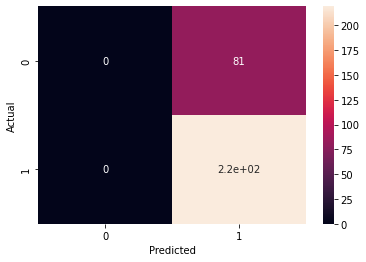

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure()
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Decision Tree

In [27]:
dataSet = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [28]:
dataSet.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_te = dataSet.predict(X_test)

In [30]:
np.sum((y_test == y_te))/y_test.size 

1.0

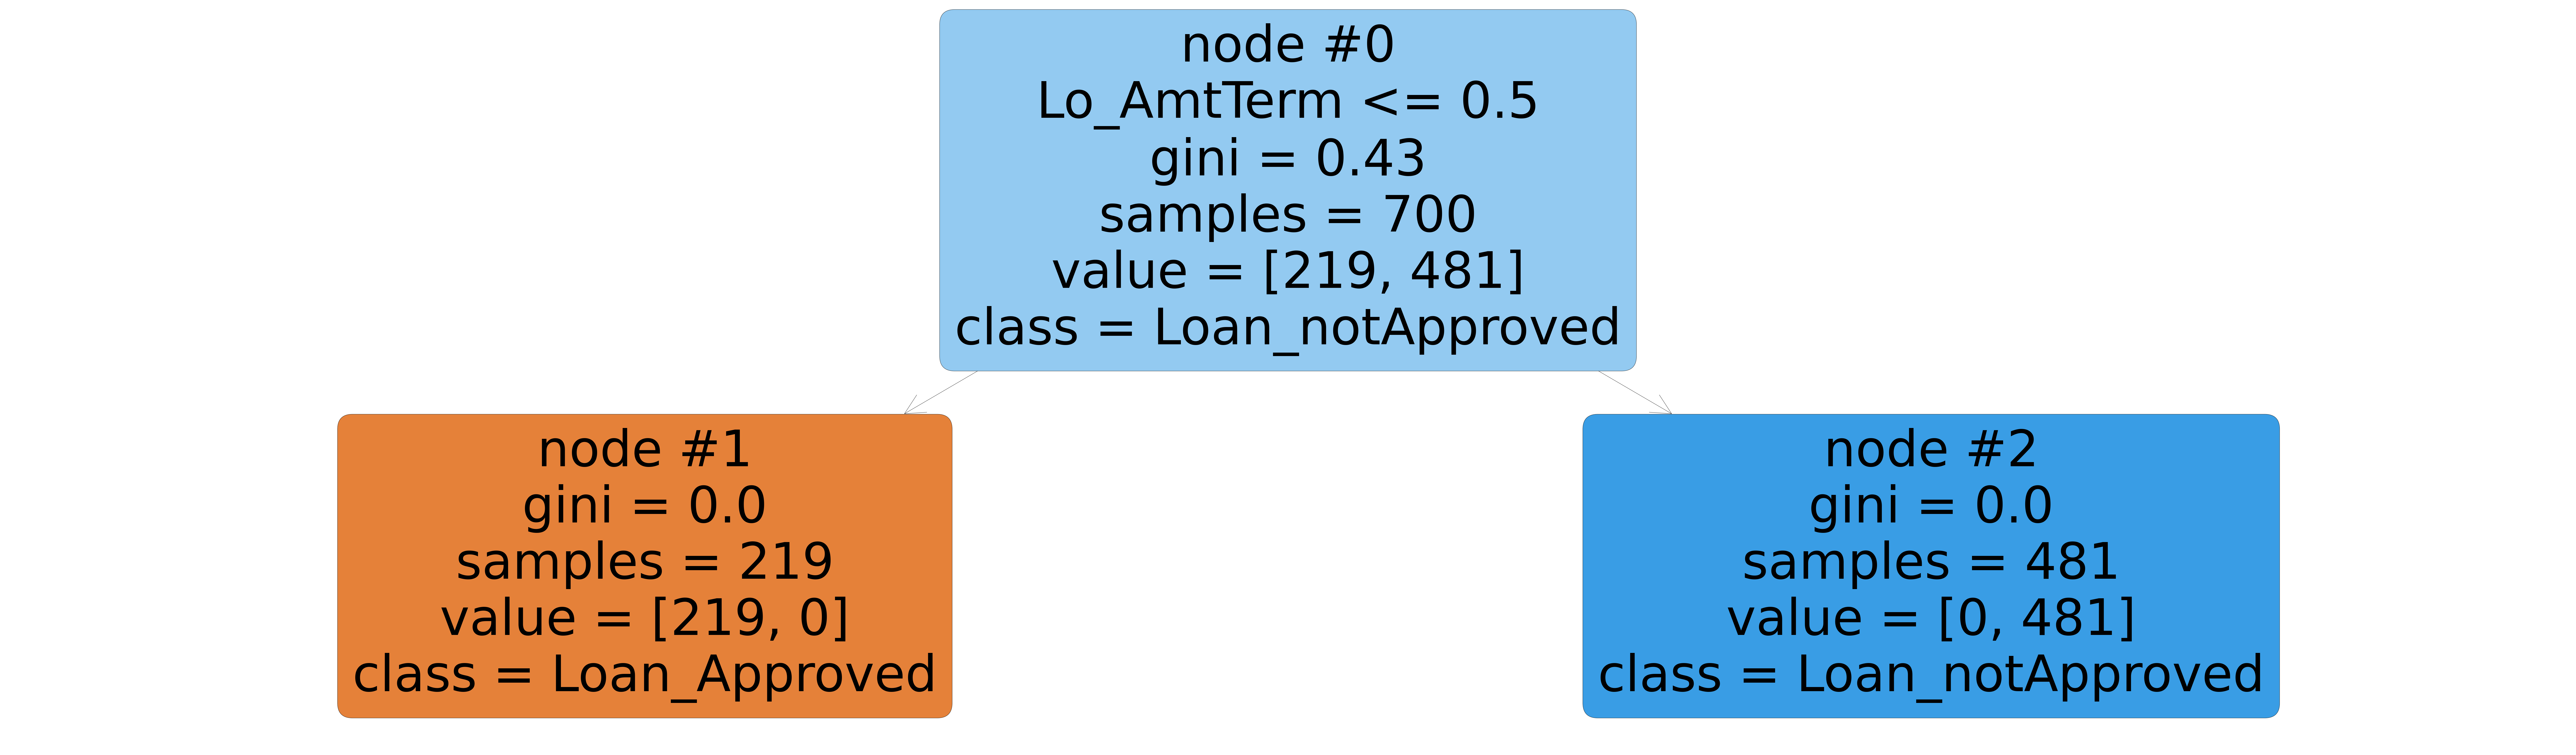

In [32]:
plt.figure(figsize=(200,60))
plot_tree(
            dataSet,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["Gen","Marr","Depen","Edu","Self_Emp","App_Inc","CoAp_Inc","Lo_Amt","Lo_AmtTerm","Crehis","Prop_Are"],
            class_names = ["Loan_Approved","Loan_notApproved"]
            )

plt.show()

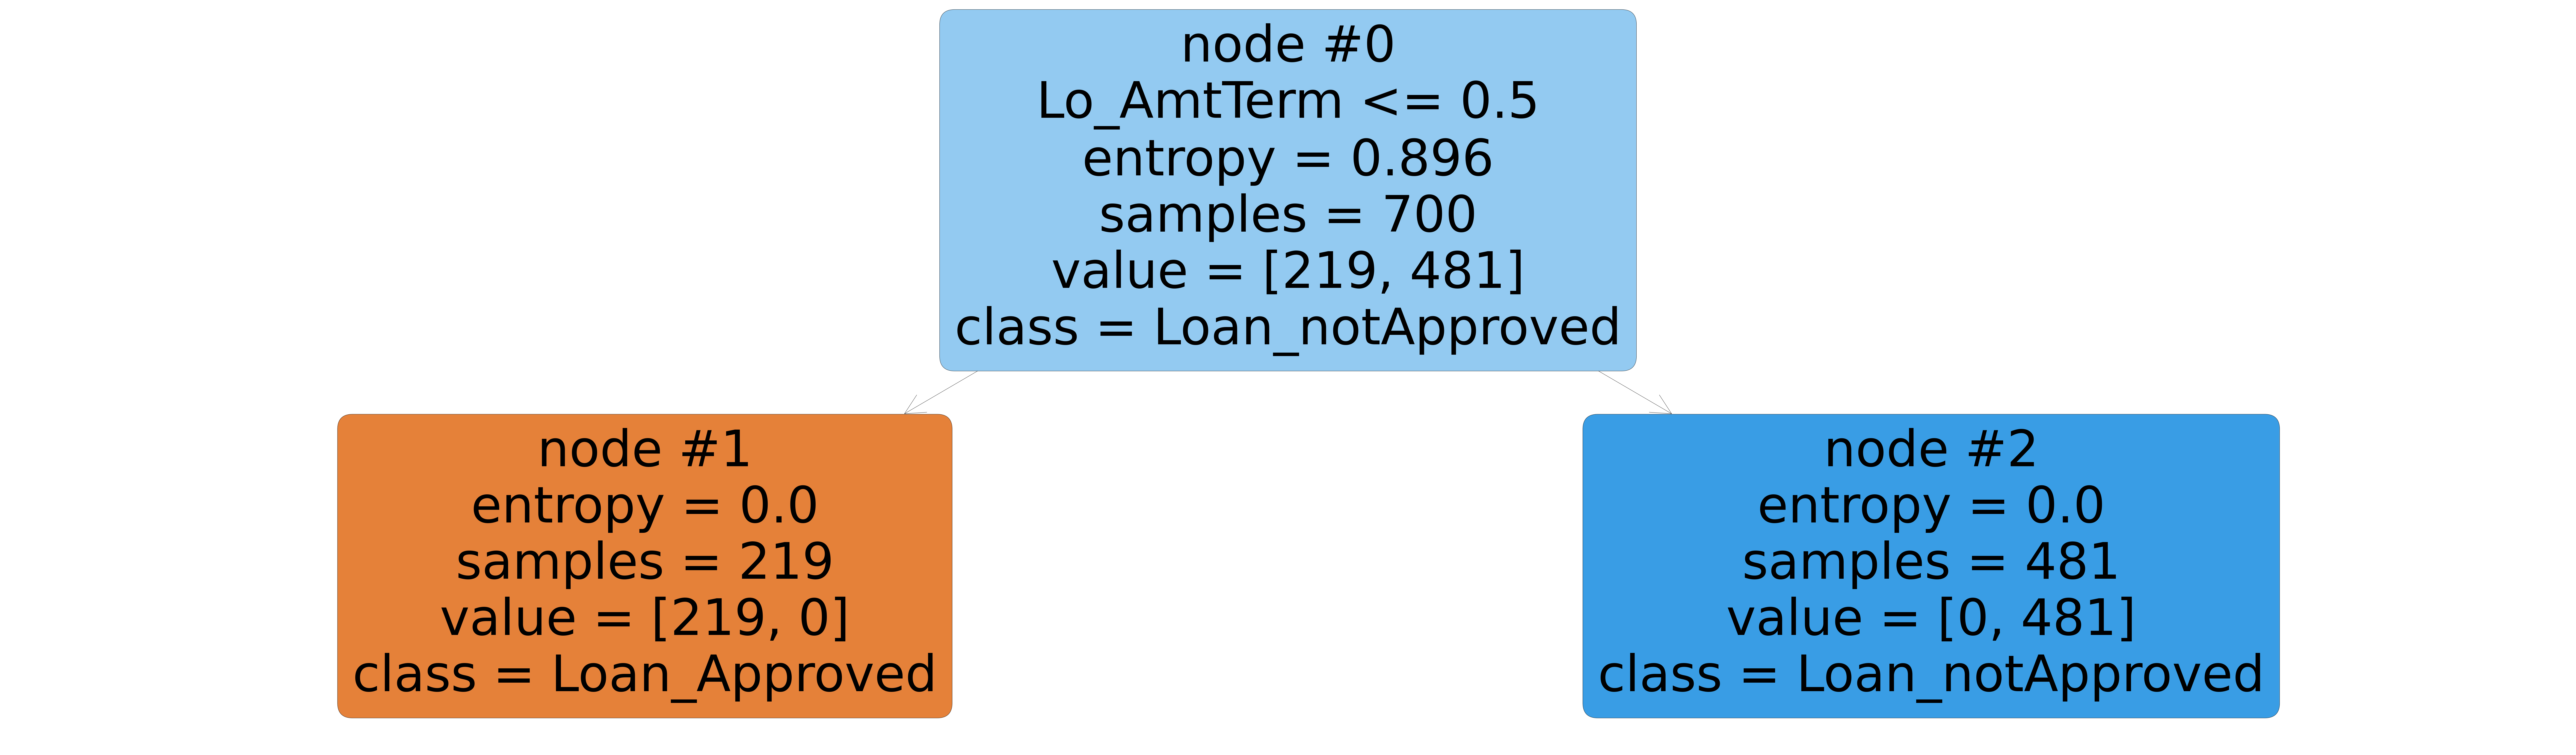

In [33]:
dataSet = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

dataSet.fit(X_train,y_train)

plt.figure(figsize=(200,60))
plot_tree(
            dataSet,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["Gen","Marr","Depen","Edu","Self_Emp","App_Inc","CoAp_Inc","Lo_Amt","Lo_AmtTerm","Crehis","Prop_Are"],
            class_names = ["Loan_Approved","Loan_notApproved"]
            )

plt.show()

In [34]:
y_te = dataSet.predict(X_test)
np.sum((y_test == y_te))/y_test.size

1.0

In [35]:
fi = dataSet.feature_importances_
fi

array([0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [36]:
list(zip(X_test.columns, fi))

[('Sex', 0.0),
 ('Job', 0.0),
 ('Housing', 0.0),
 ('Saving accounts', 0.0),
 ('Checking account', 0.0),
 ('Credit amount', 0.0),
 ('Duration', 0.0),
 ('Purpose', 0.0),
 ('Risk', 1.0)]

## Random Forest Classifier

In [37]:
model = RandomForestClassifier(n_estimators = 8)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=8)

In [38]:
model.score(X_test, y_test)

1.0

In [39]:
y_pred = model.predict(X_test)

In [40]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[ 81,   0],
       [  0, 219]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00       219

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [42]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error 0.0


In [43]:
print(metrics.confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print("Accuracy score is:", accuracy_score(y_test,y_pred)*100,"%s")

[[ 81   0]
 [  0 219]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00       219

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy score is: 100.0 %s


Text(33.0, 0.5, 'Actual')

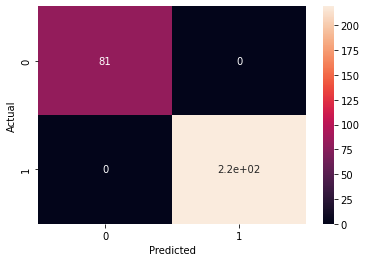

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure()
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Random Forest Classifier is the most accurate method